# HackaTUM 2022
# ABIOGENESIS

This project was completed on November 18-20, 2022

Team Members:
...






In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from main import *

# Visualize the data

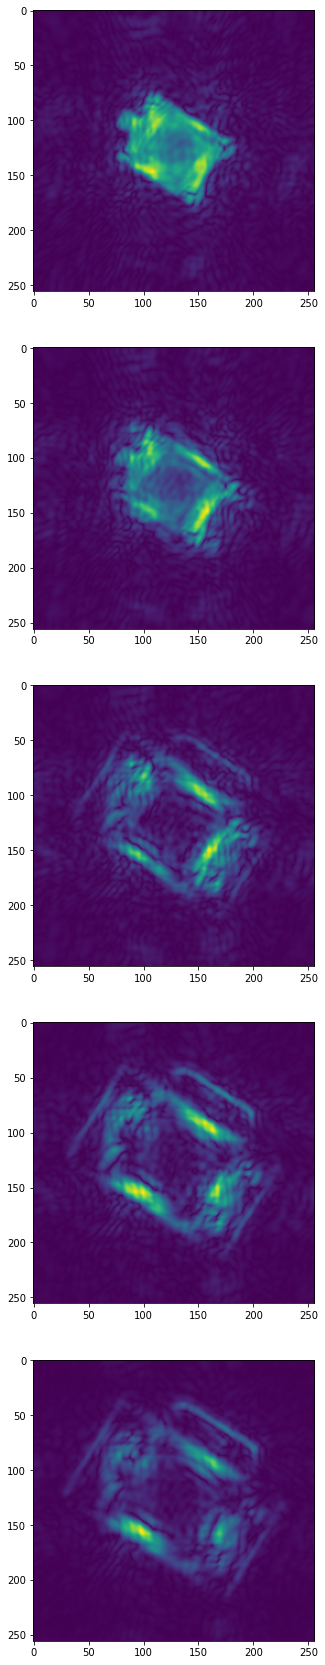

In [19]:
volume, x_vec, y_vec, z_vec = import_volume(
    r"../../volumes/example-1.img"
)

fig, ax = plt.subplots(5, figsize=(30,30))
for i in range(5):
# print(volume.shape)
    img_2d = compute_slice(volume, i*4)

    img_2d = np.abs(img_2d)
    ax[i].imshow(img_2d)
#show()

In [4]:
#!pip install -r requirements.txt

In [9]:
#main.run()

(256, 256, 32)
1 --> visualize magnitude of the MIP


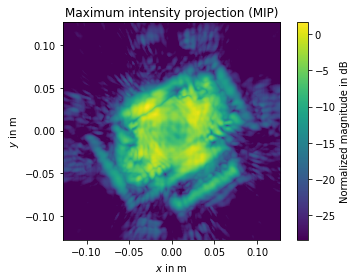

In [8]:
C0 = 299792458
FC = 77e9
LAMBDA = C0 / FC

Z_IDX = 13

volume, x_vec, y_vec, z_vec = import_volume(
    r"../../volumes/example-1.img"
)

print(volume.shape)

Nx = x_vec.size
Ny = y_vec.size

kx = (np.arange(-Nx / 2, Nx / 2 - 1)) / ((Nx - 1) * np.diff(x_vec[:2]))
ky = (np.arange(-Ny / 2, Ny / 2 - 1)) / ((Ny - 1) * np.diff(y_vec[:2]))

kx_n = kx * LAMBDA
ky_n = ky * LAMBDA

volume_max, kmax = compute_mip(volume)
volume_max_range = (np.min(np.abs(volume_max)), np.max(np.abs(volume_max)))
alpha_data = np.clip(
    1.8 * ((np.abs(volume_max) - volume_max_range[0]) / (volume_max_range[1] - volume_max_range[0])) - 0.25, 0, 1,
)

print('1 --> visualize magnitude of the MIP')
image = 20 * np.log10(np.abs(volume_max / np.max(volume_max)))
display(
    image,
    img_title="Maximum intensity projection (MIP)",
    cmap_label="Normalized magnitude in dB",
    xvec=x_vec,
    yvec=y_vec,
    dynamic_range=30,
    xlabel="$x$ in m",
    ylabel="$y$ in m",
)